In [1]:
import pandas as pd
import os
import cv2
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
data = pd.read_csv('./data/metadata.csv', index_col=None)

In [3]:
data.head()

,names,types,type_expanded,isColor,original_name,patient_id,fundus,fundus_od_seg,fundus_oc_seg,bv_seg,...,cdr_expert4,refractive_dioptre_1,refractive_dioptre_2,refractive_astigmatism,phakic_or_pseudophakic,iop_perkins,iop_pneumatic,pachymetry,axial_length,visual_field_mean_defect
0,OIA-ODIR-TEST-OFFLINE-1,0,NaN,1,1029_right.jpg,NaN,/full-fundus/OIA-ODIR-TEST-OFFLINE-1.png,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OIA-ODIR-TEST-OFFLINE-2,0,NaN,1,1049_left.jpg,NaN,/full-fundus/OIA-ODIR-TEST-OFFLINE-2.png,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OIA-ODIR-TEST-OFFLINE-4,0,NaN,1,1128_left.jpg,NaN,/full-fundus/OIA-ODIR-TEST-OFFLINE-4.png,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OIA-ODIR-TEST-OFFLINE-5,0,NaN,1,1179_right.jpg,NaN,/full-fundus/OIA-ODIR-TEST-OFFLINE-5.png,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OIA-ODIR-TEST-OFFLINE-6,0,NaN,1,1180_left.jpg,NaN,/full-fundus/OIA-ODIR-TEST-OFFLINE-6.png,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
fundus_subset = data[(data['fundus'].notnull()) & (data['fundus'] != -1) & (data['fundus_od_seg'].notnull())]
fundus_subset = fundus_subset[['fundus_od_seg', 'fundus', 'names']]
fundus_subset['fundus'] = fundus_subset['fundus'].astype(str)
fundus_subset['fundus_od_seg'] = fundus_subset['fundus_od_seg'].astype(str)

fundus_subset_random = fundus_subset.sample(frac=1, random_state=1)
fundus_subset_random

test_size = int(0.1 * len(fundus_subset_random))

seg_test = fundus_subset_random.tail(test_size)
seg_trainval = fundus_subset_random.head(len(fundus_subset_random)-test_size)

val_size = int(0.1 * len(seg_trainval))
seg_train = seg_trainval.head(len(seg_trainval)-val_size)
seg_val = seg_trainval.tail(val_size)

In [5]:
seg_train

,fundus_od_seg,fundus,names
8135,/optic-disc/G1020-864.png,/full-fundus/G1020-864.png,G1020-864
8121,/optic-disc/G1020-850.png,/full-fundus/G1020-850.png,G1020-850
12038,/optic-disc/PAPILA-478.png,/full-fundus/PAPILA-478.png,PAPILA-478
4644,/optic-disc/ORIGA-99.png,/full-fundus/ORIGA-99.png,ORIGA-99
6438,/optic-disc/REFUGE1-train-208.png,/full-fundus/REFUGE1-train-208.png,REFUGE1-train-208
...,...,...,...
6989,/optic-disc/REFUGE1-val-118.png,/full-fundus/REFUGE1-val-118.png,REFUGE1-val-118
4792,/optic-disc/ORIGA-247.png,/full-fundus/ORIGA-247.png,ORIGA-247
8189,/optic-disc/G1020-918.png,/full-fundus/G1020-918.png,G1020-918
6356,/optic-disc/REFUGE1-train-126.png,/full-fundus/REFUGE1-train-126.png,REFUGE1-train-126


In [6]:
import sys
sys.path.append('./models')
from dataset import GlaucomaSegmentationLDM
datamodule = GlaucomaSegmentationLDM(batch_size=2)

C:\Users\mmapa\anaconda3\lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [7]:
datamodule.setup("fit")
train = datamodule.train

In [8]:
img, label = train[0]

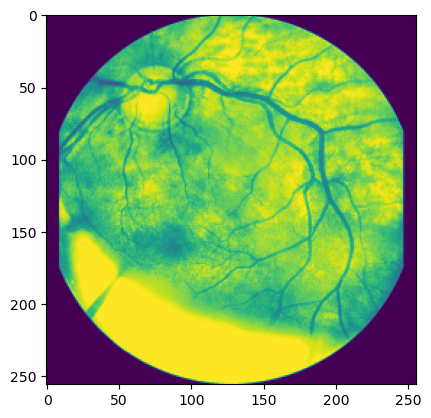

In [9]:
plt.imshow(img[0])

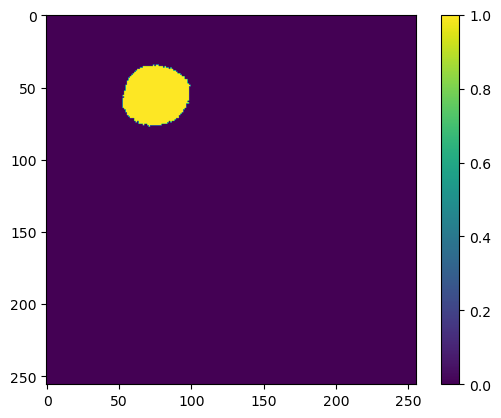

In [10]:
plt.imshow(label); plt.colorbar();

In [1]:
fundus_subset = data[(data['fundus'].notnull()) & (data['fundus'] != -1) & (data['types'] != -1)]
fundus_subset = fundus_subset[['types', 'fundus', 'names']]

fundus_subset['combined'] = fundus_subset['names'] + '.png'

fundus_subset['fundus'] = fundus_subset['fundus'].astype(str)

fundus_subset['types'] = fundus_subset['types'].astype(int)

NameError: name 'data' is not defined

In [ ]:
fundus_subset = data[(data['fundus'].notnull()) & (data['fundus'] != -1) & (data['types'] != -1)]

In [ ]:
fundus_subset.head()

In [ ]:
# glaucoma fundus images
glaucomaCount = len(fundus_subset[(fundus_subset['types'] == 1)])
print(glaucomaCount)

# healthy fundus images
healthyCount = len(fundus_subset[(fundus_subset['types'] == 0)])
print(healthyCount)

# randomize data
fundus_subset_random = fundus_subset.sample(frac=1, random_state=1)

In [ ]:
# create df for each class based on randomized data
healthy_subset = fundus_subset_random[fundus_subset_random['types'] == 0]
glaucoma_subset = fundus_subset_random[fundus_subset_random['types'] == 1]

In [ ]:
testSize = 0.1 * len(glaucoma_subset)

In [ ]:
glaucoma_subset[['fundus', 'types']].reset_index().drop(columns='index')

In [ ]:
glaucoma_subset.iloc[0]['types']

In [ ]:
import sys
sys.path.append('./models')
from dataset import GlaucomaLDM

In [ ]:
datamodule = GlaucomaLDM(batch_size=8)

In [ ]:
datamodule.setup("fit")

In [ ]:
train_loader = datamodule.train_dataloader()
val_loader = datamodule.val_dataloader()
test_loader = datamodule.test_dataloader()

In [ ]:
len(test_loader), len(val_loader)

In [ ]:
len(train_loader)

In [ ]:
image, label = next(iter(train_loader))

In [ ]:
image.shape, image.dtype

In [ ]:
label

In [ ]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 4, figsize=(12, 6))
ax1[0].imshow(image[0].detach().cpu().numpy().transpose(1, 2, 0))
ax1[1].imshow(image[1].detach().cpu().numpy().transpose(1, 2, 0))
ax1[2].imshow(image[4].detach().cpu().numpy().transpose(1, 2, 0))
ax1[3].imshow(image[5].detach().cpu().numpy().transpose(1, 2, 0))
ax2[0].imshow(image[2].detach().cpu().numpy().transpose(1, 2, 0))
ax2[1].imshow(image[3].detach().cpu().numpy().transpose(1, 2, 0))
ax2[2].imshow(image[6].detach().cpu().numpy().transpose(1, 2, 0))
ax2[3].imshow(image[7].detach().cpu().numpy().transpose(1, 2, 0))
fig.suptitle('Healthy and Glaucoma Fundus Images', fontsize=18)

In [ ]:
label

In [ ]:
from models import U_Net

In [ ]:
model = U_Net()
model(image).shape

In [ ]:
sys.path.append('./models/Optic-Disk-Cup-Segmentation/src/segmentation code')
from models import FCDenseModified
model2 = FCDenseModified(in_channels=3)
model2(image).shape
model2(image)

In [ ]:
from models import EarlyId
model3 = EarlyId(3)

In [ ]:
model3(image).shape

In [ ]:
from models import LightningModel
lm = LightningModel("U-Net", None)

In [ ]:
import torch
loss = torch.nn.BCELoss()

In [ ]:
out = model(image)

In [ ]:
out, label
label.resize_(out.size(dim=0), 1)
loss(out, label.to(torch.float))

In [ ]:
sigmoid = torch.nn.Sigmoid()
sigmoid(out)

In [ ]:
from torchmetrics.classification import BinaryAccuracy, BinaryPrecision, BinaryRecall, BinaryF1Score
acc = BinaryAccuracy()

In [ ]:
out, label
torch.any(label == 1)
#acc(out, label)